## LoRaWAN Experiment

In [2]:
import pandas as pd
import folium
import math
import numpy as np
from scipy.optimize import minimize
import random

In [5]:
data = pd.read_csv("../data/raw/test-data.csv", delimiter=";")

### Position 1

In [6]:
mask = (data["tstamp"] > "2022-09-14 12:35") & (data["tstamp"] <= "2022-09-14 12:37")
data.loc[mask]

,id,tstamp,uuid,time,longitude,latitude,altitude,satellites,battery,rssi,sensor_type,sensor1,sensor2
39,40,2022-09-14 12:35:20,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12351800,12.171630,47.583963,494,10,59,-95,air-quality,2,73
40,41,2022-09-14 12:35:33,50215bd6-e68f-476b-aaf1-dc53f70af90a,12353200,12.171674,47.584059,497,9,61,-91,air-quality,3,82
41,42,2022-09-14 12:35:45,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12354400,12.171600,47.583896,493,10,59,-97,air-quality,2,6e
42,43,2022-09-14 12:35:56,50215bd6-e68f-476b-aaf1-dc53f70af90a,12355400,12.171689,47.584067,498,9,61,-91,air-quality,3,80
43,44,2022-09-14 12:36:14,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12361300,12.171585,47.583889,491,10,59,-98,air-quality,2,65
44,45,2022-09-14 12:36:15,50215bd6-e68f-476b-aaf1-dc53f70af90a,12361400,12.171674,47.584052,499,11,61,-97,air-quality,3,74
45,46,2022-09-14 12:36:38,50215bd6-e68f-476b-aaf1-dc53f70af90a,12363600,12.171674,47.584081,500,10,61,-98,air-quality,3,6b
46,47,2022-09-14 12:36:40,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12363800,12.171615,47.583933,491,10,59,-102,air-quality,2,67


In [7]:
rssi_pos1 = data.loc[mask]["rssi"].mean()
rssi_pos1

-96.125

### Position 2

In [8]:
mask = (data["tstamp"] > "2022-09-14 12:39") & (data["tstamp"] <= "2022-09-14 12:41")
data.loc[mask]

,id,tstamp,uuid,time,longitude,latitude,altitude,satellites,battery,rssi,sensor_type,sensor1,sensor2
59,60,2022-09-14 12:39:17,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12391600,12.172133,47.583556,493,12,58,-89,air-quality,3,31
60,61,2022-09-14 12:39:18,50215bd6-e68f-476b-aaf1-dc53f70af90a,12391700,12.172148,47.583593,491,11,61,-87,air-quality,3,51
61,62,2022-09-14 12:39:36,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12393500,12.172148,47.583570,496,11,59,-91,air-quality,2,37
62,63,2022-09-14 12:39:44,50215bd6-e68f-476b-aaf1-dc53f70af90a,12394200,12.172163,47.583593,495,12,61,-94,air-quality,3,4d
63,64,2022-09-14 12:40:05,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12400400,12.172133,47.583556,496,12,59,-86,air-quality,2,3a
64,65,2022-09-14 12:40:09,50215bd6-e68f-476b-aaf1-dc53f70af90a,12400800,12.172133,47.583578,497,12,61,-94,air-quality,3,40
65,66,2022-09-14 12:40:25,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12402300,12.172133,47.583556,498,12,59,-88,air-quality,2,35
66,67,2022-09-14 12:40:31,50215bd6-e68f-476b-aaf1-dc53f70af90a,12403000,12.172148,47.583578,500,12,60,-97,air-quality,3,40
67,68,2022-09-14 12:40:44,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12404200,12.172148,47.583489,494,11,58,-88,air-quality,3,2f
68,69,2022-09-14 12:40:51,50215bd6-e68f-476b-aaf1-dc53f70af90a,12405000,12.172222,47.583467,495,12,61,-89,air-quality,3,4a


In [9]:
rssi_pos2 = data.loc[mask]["rssi"].mean()
rssi_pos2

-90.3

### Position 3

In [10]:
mask = (data["tstamp"] > "2022-09-14 12:42") & (data["tstamp"] <= "2022-09-14 12:44")
data.loc[mask]

,id,tstamp,uuid,time,longitude,latitude,altitude,satellites,battery,rssi,sensor_type,sensor1,sensor2
75,76,2022-09-14 12:42:15,50215bd6-e68f-476b-aaf1-dc53f70af90a,12421300,12.172770,47.583681,510,12,61,-90,air-quality,3,40
76,77,2022-09-14 12:42:17,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12421500,12.172756,47.583652,512,12,58,-79,air-quality,3,2a
77,78,2022-09-14 12:42:36,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12423500,12.172756,47.583674,512,12,58,-80,air-quality,3,23
78,79,2022-09-14 12:42:40,50215bd6-e68f-476b-aaf1-dc53f70af90a,12423900,12.172800,47.583704,517,12,61,-91,air-quality,3,35
79,80,2022-09-14 12:42:55,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12425400,12.172741,47.583681,512,12,58,-78,air-quality,3,21
80,81,2022-09-14 12:43:03,50215bd6-e68f-476b-aaf1-dc53f70af90a,12430100,12.172785,47.583696,519,12,61,-80,air-quality,3,40
81,82,2022-09-14 12:43:15,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12431300,12.172741,47.583674,511,12,58,-79,air-quality,3,2d
82,83,2022-09-14 12:43:21,50215bd6-e68f-476b-aaf1-dc53f70af90a,12432100,12.172785,47.583674,515,12,60,-75,air-quality,3,32
83,84,2022-09-14 12:43:35,15c8c0b9-4a49-4167-abd0-113be94dd4f2,12433300,12.172815,47.583741,507,12,58,-76,air-quality,3,24
84,85,2022-09-14 12:43:48,50215bd6-e68f-476b-aaf1-dc53f70af90a,12434600,12.172874,47.583830,503,12,60,-80,air-quality,3,31


In [11]:
rssi_pos3 = data.loc[mask]["rssi"].mean()
rssi_pos3

-80.8

### Add Coordinates from Tiris
https://maps.tirol.gv.at/synserver?user=guest&project=tmap_master

In [12]:
import haversine as hs
from haversine import Unit

df = pd.DataFrame({
    "id": ["pos_1","pos_2","pos_3","target"],
    "lng": [12.171577,12.172158,12.172817,12.172852],
    "lat": [47.584028,47.583585,47.583613,47.584030],
    "rssi": [rssi_pos1, rssi_pos2, rssi_pos3,None],
    "distance [m]": [
        hs.haversine((47.584028, 12.171577), (47.584030, 12.172852), Unit.METERS),
        hs.haversine((47.583585, 12.172158), (47.584030, 12.172852), Unit.METERS),
        hs.haversine((47.583613, 12.172817), (47.584030, 12.172852), Unit.METERS),
        None
    ]
}) 
df

,id,lng,lat,rssi,distance [m]
0,pos_1,12.171577,47.584028,-96.125,95.627801
1,pos_2,12.172158,47.583585,-90.300,71.817958
2,pos_3,12.172817,47.583613,-80.800,46.442597
3,target,12.172852,47.584030,NaN,NaN


#### Plot RSSI to distance

<AxesSubplot: xlabel='distance [m]'>

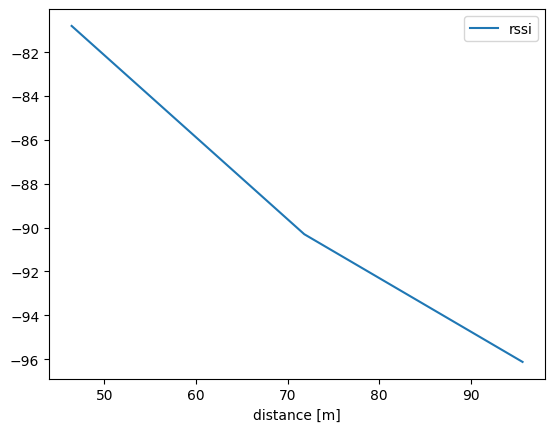

In [14]:
df.plot(x="distance [m]", y="rssi")

#### Plot Map

In [29]:
m = folium.Map(
    location=[df["lat"][0], df["lng"][0]],
    zoom_start=17
)

points = [ p for p in list(zip(df["lat"], df["lng"], df["distance [m]"]))]

folium.Marker(
    location=[df["lat"][3], df["lng"][3]],
    icon=folium.Icon(color="green", icon="circle", prefix="fa")
).add_to(m)

for p in points:
    folium.Circle(
        radius=p[2],
        location=[p[0], p[1]],
        popup="The Waterfront",
        color="crimson",
        fill=False,
    ).add_to(m)

    folium.Marker(
        location=[p[0], p[1]],
        icon=folium.Icon(color="blue", icon="circle", prefix="fa")
    ).add_to(m)

m

### Trilateration Test

https://www.alanzucconi.com/2017/03/13/positioning-and-trilateration/

In [30]:
def mse(x, locations, distances):
    mse = 0.0
    for location, distance in zip(locations, distances):
        distance_calculated = hs.haversine(tuple(x), tuple(location), Unit.METERS)
        mse += math.pow(distance_calculated - distance, 2.0)
    return mse / len(distances)

In [31]:

min_dist_row = df.loc[:2].sort_values("distance [m]").iloc[0]
initial_location = min_dist_row["lat"], min_dist_row["lng"]

points = [ p for p in list(zip(df["lat"], df["lng"], df["distance [m]"]))]

locations = [(p[0], p[1]) for p in points]
# distances = [p[2] + random.random()*40-20 for p in points[:3]] # experiment with noise
distances = [p[2] for p in points[:3]]

result = minimize(
    mse,                         # The error function
    initial_location,            # The initial guess (e.g. location with minimum distance to point)
    args=(locations, distances), # Additional parameters for mse
    method='L-BFGS-B',           # The optimisation algorithm
    options={
        'ftol':1e-5,         # Tolerance
        'maxiter': 1e+7      # Maximum iterations
    })
location = result.x
location

array([47.58403 , 12.172852])

#### Visualize Prediction

In [40]:
m = folium.Map(
    location=[df["lat"][0], df["lng"][0]],
    zoom_start=17
)

points = [ p for p in list(zip(df["lat"], df["lng"], distances))]

folium.Marker(
    location=[df["lat"][3], df["lng"][3]],
    icon=folium.Icon(color="green", icon="circle", prefix="fa")
).add_to(m)

folium.Marker(
    location=list(location),
    icon=folium.Icon(color="red", icon="bullseye", prefix="fa")
).add_to(m)

for p in points:
    folium.Circle(
        radius=p[2],
        location=[p[0], p[1]],
        popup="The Waterfront",
        color="crimson",
        fill=False,
    ).add_to(m)

    folium.Marker(
        location=[p[0], p[1]],
        icon=folium.Icon(color="blue", icon="circle", prefix="fa")
    ).add_to(m)

m